<a href="https://colab.research.google.com/github/Deauth-Eater/Divination/blob/main/WoW-PvP-Season-32-End-Date-Prophecy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Part 1: Gather & Store Data

In [ ]:
tables = pd.read_html('https://web.archive.org/web/20220324234848/https://dotesports.com/news/start-end-dates-world-of-warcraft-arena-seasons')

## Part 2: Clean & Organize Data

In [ ]:
seasons = tables[1]

In [ ]:
seasons.columns = seasons.iloc[0]
seasons = seasons.drop(0,axis=0)

In [ ]:
seasons['Start date'] = pd.to_datetime(seasons['Start date'])
seasons['Start epoch'] = seasons['Start date'].view('int64')//1e9

In [ ]:
season_32 = seasons.loc[32]
seasons = seasons.drop(32,axis=0)

In [ ]:
seasons['End date'] = pd.to_datetime(seasons['End date'])
seasons['End epoch'] = seasons['End date'].view('int64')//1e9

## Part 3: EDA

In [ ]:
seasons.tail()

,Season,Title,Gladiator mount,Start date,End date,Start epoch,End epoch
27,Battle for Azeroth season two (27),Sinister Gladiator,Sinister Gladiator’s Proto-Drake,2019-01-22,2019-06-25,1.548115e+09,1.561421e+09
28,Battle for Azeroth season three (28),Notorious Gladiator,Notorious Gladiator’s Proto-Drake,2019-07-08,2020-01-14,1.562544e+09,1.578960e+09
29,Battle for Azeroth season four (29),Corrupted Gladiator,Corrupted Gladiator’s Proto-Drake,2020-01-21,2020-10-13,1.579565e+09,1.602547e+09
30,Shadowlands season one (30),Sinful Gladiator,Sinful Gladiator’s Soul Eater,2020-12-08,2021-06-28,1.607386e+09,1.624838e+09
31,Shadowlands season two (31),Unchained Gladiator,Unchained Gladiator’s Soul Eater,2021-07-06,2022-02-21,1.625530e+09,1.645402e+09


In [ ]:
season_32

0
Season             Shadowlands season three (32)
Title                           Cosmic Gladiator
Gladiator mount    Cosmic Gladiator’s Soul Eater
Start date                   2022-03-01 00:00:00
End date                                     TBA
Start epoch                         1646092800.0
Name: 32, dtype: object

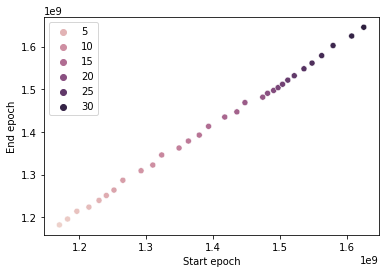

In [ ]:
sns.scatterplot(data=seasons,x='Start epoch',y='End epoch',hue=seasons.index)

## Part 4: ML

### Simple Linear Regression

In [ ]:
df = seasons[['Start epoch','End epoch']]

In [ ]:
df.head()

,Start epoch,End epoch
1,1.170115e+09,1.182211e+09
2,1.182298e+09,1.196035e+09
3,1.196208e+09,1.214179e+09
4,1.214266e+09,1.223942e+09
5,1.229386e+09,1.239667e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Start epoch  31 non-null     float64
 1   End epoch    31 non-null     float64
dtypes: float64(2)
memory usage: 744.0 bytes


In [ ]:
df.describe()

,Start epoch,End epoch
count,3.100000e+01,3.100000e+01
mean,1.400023e+09,1.413995e+09
std,1.373447e+08,1.374442e+08
min,1.170115e+09,1.182211e+09
25%,1.278677e+09,1.298030e+09
50%,1.417478e+09,1.435018e+09
75%,1.507896e+09,1.516666e+09
max,1.625530e+09,1.645402e+09


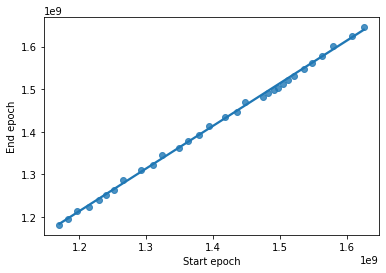

In [ ]:
sns.regplot(x='Start epoch',y='End epoch',data=df)

In [ ]:
X = df['Start epoch']
y = df['End epoch']

In [ ]:
b,a = np.polyfit(X,y,deg=1)

In [ ]:
from datetime import datetime
prophecy = datetime.fromtimestamp(a+b*season_32['Start epoch']).strftime('%b. %d, %Y')

In [ ]:
prophecy

'Aug. 09, 2022'

### Prophecy + Domain Knowledge = Interpretation
Interpretation: Shadowlands Season 3 (32) will end on Tuesday, 9th of August, 2022 at 22:00 CET for European Realms and Monday, August 8th 10pm PST for North American Realms.